## Name: Adwaiy Singh
## Reg No.: 220968424
## Class: DSE-A
## Batch: A2

# Week 3

## EXERCISE 1: Data Analysis using mtcars

#### 1. Find the car with the best mpg

In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("mtcars.csv")
df['mpg'].max()

33.9


#### 2. Find the car with the worst mpg

In [4]:
df['mpg'].min()

10.4


#### 3. Find the car with the best horsepower

In [5]:
df['hp'].max()

335


#### 4. Find 5 number summary of displacement

In [6]:
df['disp'].describe()

count     32.000000
mean     230.721875
std      123.938694
min       71.100000
25%      120.825000
50%      196.300000
75%      326.000000
max      472.000000
Name: disp, dtype: float64


#### 5. Find median horse power

In [7]:
df['hp'].median()

123.0


#### 6. What is average mpg for manual vs. automatic cars

In [8]:
df1 = df[['mpg']][df['am'] == 1].mean()
df2 = df[['mpg']][df['am'] == 0].mean()

print(df1)
print(df2)

mpg    24.392308
dtype: float64
mpg    17.147368
dtype: float64



#### 7. Draw a histogram of miles per gallon

<Axes: xlabel='mpg', ylabel='Count'>

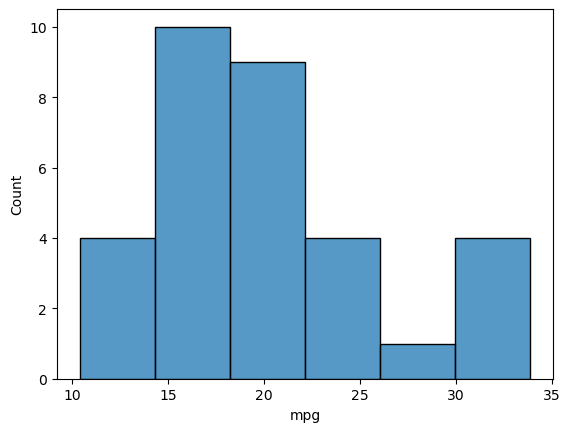

In [9]:
sns.histplot(data=df, x='mpg')


#### 8. Boxplot of mpg for each cylinder type

<Axes: xlabel='cyl', ylabel='mpg'>

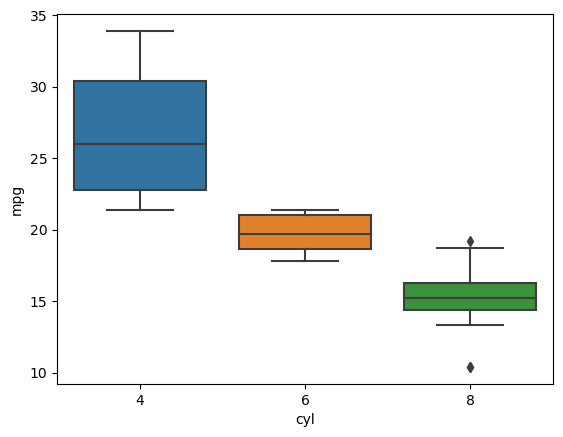

In [10]:
sns.boxplot(data=df, x='cyl', y='mpg')


#### 9. Create a crosstab displaying count of automatic vs. manual cars

In [12]:
crosstab = pd.crosstab(index=df['am'], columns='count')
crosstab.index=['Manual','Automatic']
print(crosstab)

col_0      count
Manual        19
Automatic     13



#### 10. Create a crosstab displaying count of “am vs cyl”

In [18]:
pd.crosstab(df['am'], df['cyl'])

cyl,4,6,8
am,,,
0,3,4,12
1,8,3,2



#### 11. What is the correlation between the weight of the car and mpg

In [11]:
df['wt'].corr(df['cyl'])

0.7824957944632409

## EXERCISE 2: Descriptive Analytics and Visualization

### The data file bollywood.csv contains box office collection and social media promotion information about movies released in 2013−2015 period. Following are the columns and their descriptions:
#### • SlNo 
#### • Release Date 
#### • MovieName – Name of the movie 
#### • ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal) 
#### • Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc 
#### • Budget – Movie creation budget 
#### • BoxOfficeCollection – Box office collection 
#### • YoutubeViews – Number of views of the YouTube trailers 
#### • YoutubeLikes – Number of likes of the YouTube trailers 
#### • YoutubeDislikes – Number of dislikes of the YouTube trailers 

### Use Python code to answer the following questions: 
#### 1. How many records are present in the dataset? 

In [21]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("bollywood.csv")
len(df)

10


#### 2. How many movies got released in each genre? Sort number of releases in each genre in descending order. 

In [13]:
df['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64


#### 3. Which genre had highest number of releases? 4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.) 

In [14]:
df['Genre'].value_counts().idxmax()

'Comedy'

#### 4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [15]:
pd.crosstab(df['Genre'], df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2



#### 5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.) 

In [16]:
df['Month'] = pd.DatetimeIndex(df['Release Date']).month_name()
df['Month'].value_counts().idxmax()

'January'


#### 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 

In [17]:
df[df['Budget'] >= 25]['Month'].value_counts().idxmax()

'February'


#### 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 

In [22]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
df['ROI'].nlargest(10)

64     8.166667
89     7.647059
132    7.514286
135    7.500000
87     6.240000
58     5.933333
128    5.666667
37     5.500000
101    4.466667
115    4.266667
Name: ROI, dtype: float64


#### 8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times. 

In [19]:
crosstab = pd.crosstab(index=df['ReleaseTime'], columns='Avg.', values = df['ROI'], aggfunc = 'mean')
crosstab.index=['FS','HS', 'LW', 'N']
print(crosstab)

col_0      Avg.
FS     0.973853
HS     0.850867
LW     1.127205
N      0.657722



#### 9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative? 

In [20]:
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

0.6825165877731297


#### 10. Which genre of movies typically sees more YouTube likes? Draw boxplots for eachgenre of movies to compare. 

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

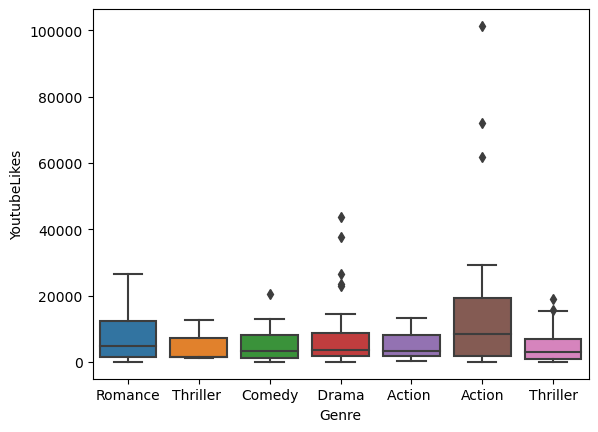

In [21]:
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')


#### 11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap. 

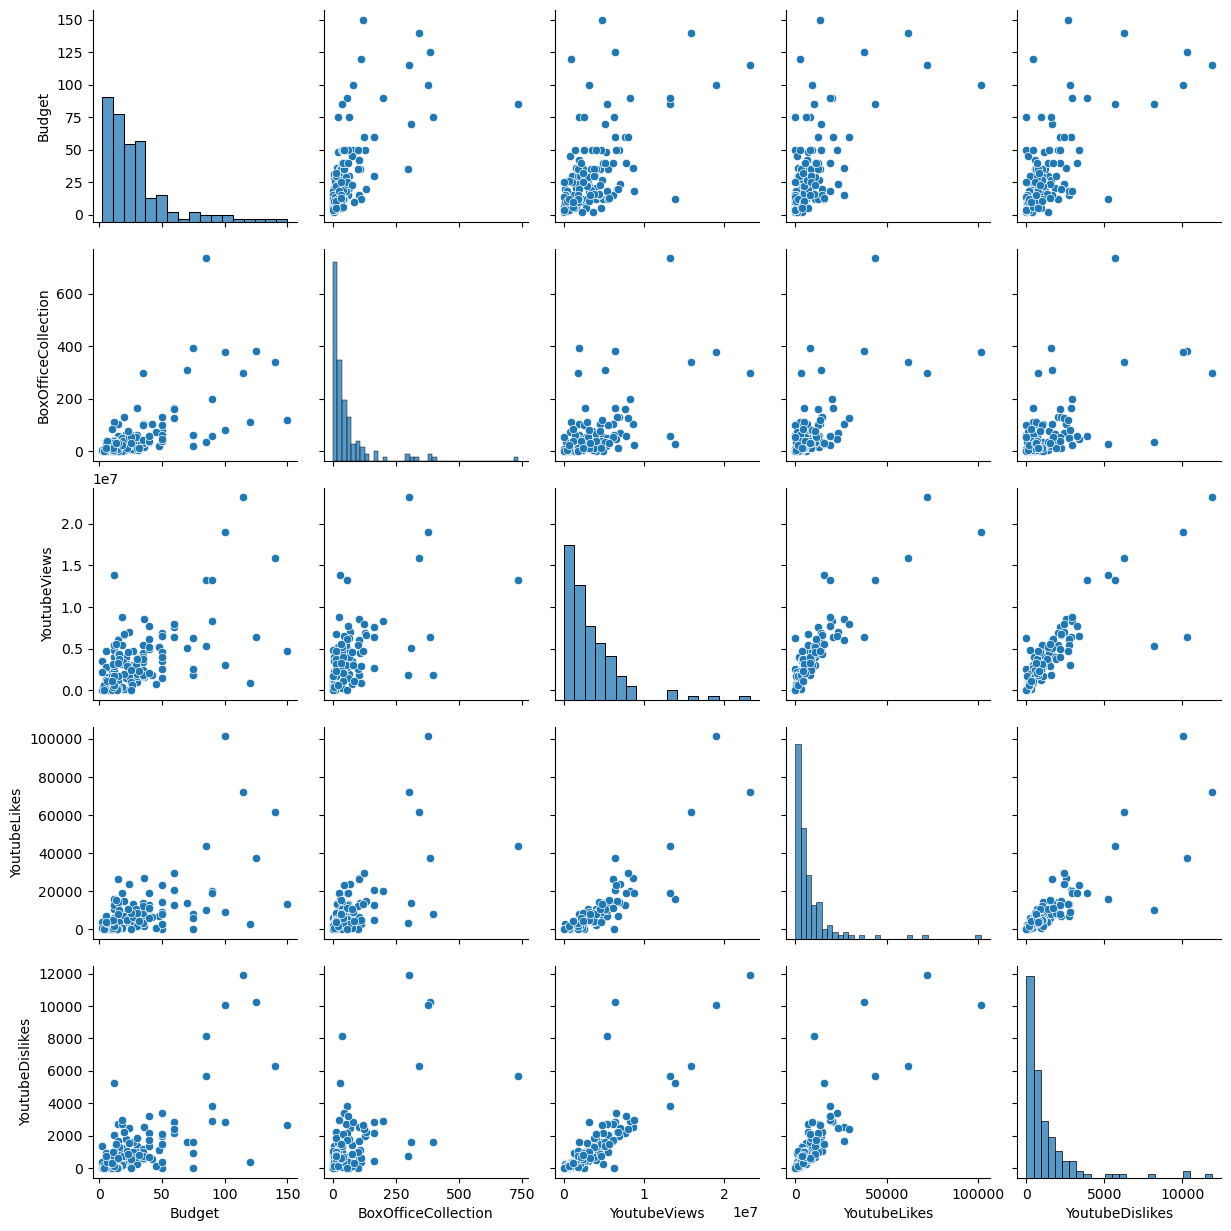

In [22]:
sns.pairplot(data=df, vars=['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes'])


#### 12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

2015    12
2013    67
2014    70
Name: year, dtype: int64


<Axes: xlabel='Genre', ylabel='BoxOfficeCollection'>

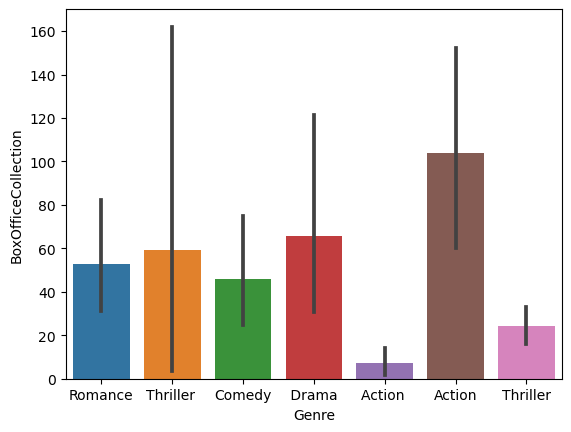

In [23]:
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['Release Date'])).year
print(df['year'].value_counts().sort_values())
sns.barplot(data = df, x='Genre', y='BoxOfficeCollection')

 
#### 13. Visualize the Budget and Box office collection based on Genre. 

<Axes: xlabel='Genre', ylabel='BoxOfficeCollection'>

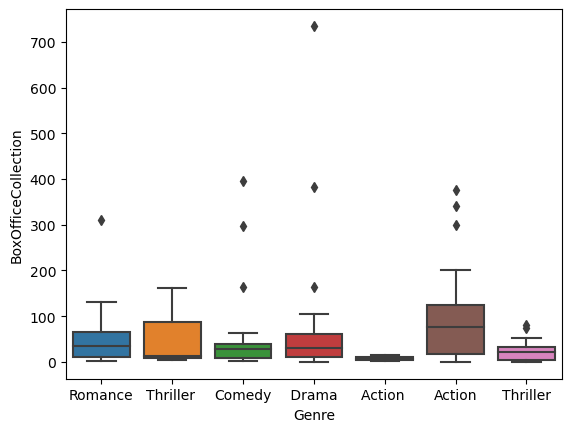

In [24]:
sns.boxplot(data=df, x='Genre', y='BoxOfficeCollection')


#### 14. Find the distribution of movie budget for every Genre. 

<Axes: xlabel='Genre', ylabel='Budget'>

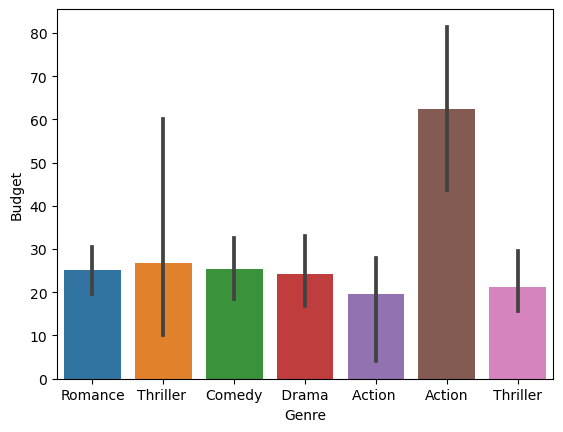

In [25]:
sns.barplot(data=df, x='Genre', y='Budget')


#### 15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph

<Axes: xlabel='year', ylabel='count'>

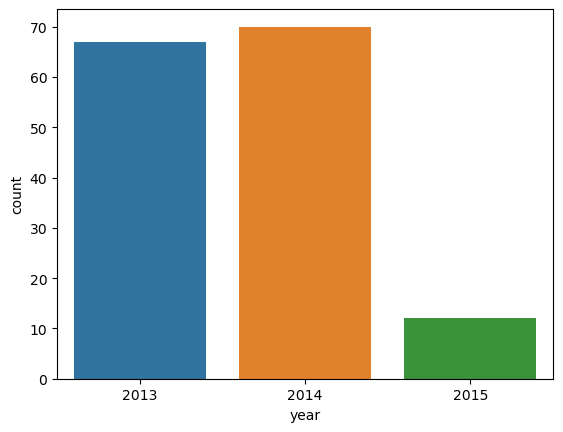

In [26]:
sns.countplot(data=df, x='year')